# Making plots for the paper, in the corresponding order.

In [4]:
%matplotlib inline

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# import starspot as ss

plotpar = {'axes.labelsize': 30,
           'font.size': 22,
           'legend.fontsize': 10,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [6]:
df0 = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,20,21,22,28,30,54,55,56,74,76,155,156,176) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
print(len(df0))
f = np.isfinite(df0.color_teffs.values) & (df0.color_teffs.values > 2000) & (df0.color_teffs.values < 10000)
df = df0.iloc[f]
print("removing stars with weird teffs")
print(len(df))

178000
removing stars with weird teffs
177026


Make the plot of RV histograms.

In [8]:
m = np.isfinite(df.rv.values)

minimum teff star with RV =  2392.745473104922
0.4224986601224225 of stars cooler than 5000 K have RVs
0.279300723997881 of stars hotter than 5000 K have RVs
faintest star with RV =  17.582468032836914
Median mag of stars with RVs = 13.00484323501587
Median mag of stars without RVs = 15.053181648254395
2414 stars with RVs fainter than 15th


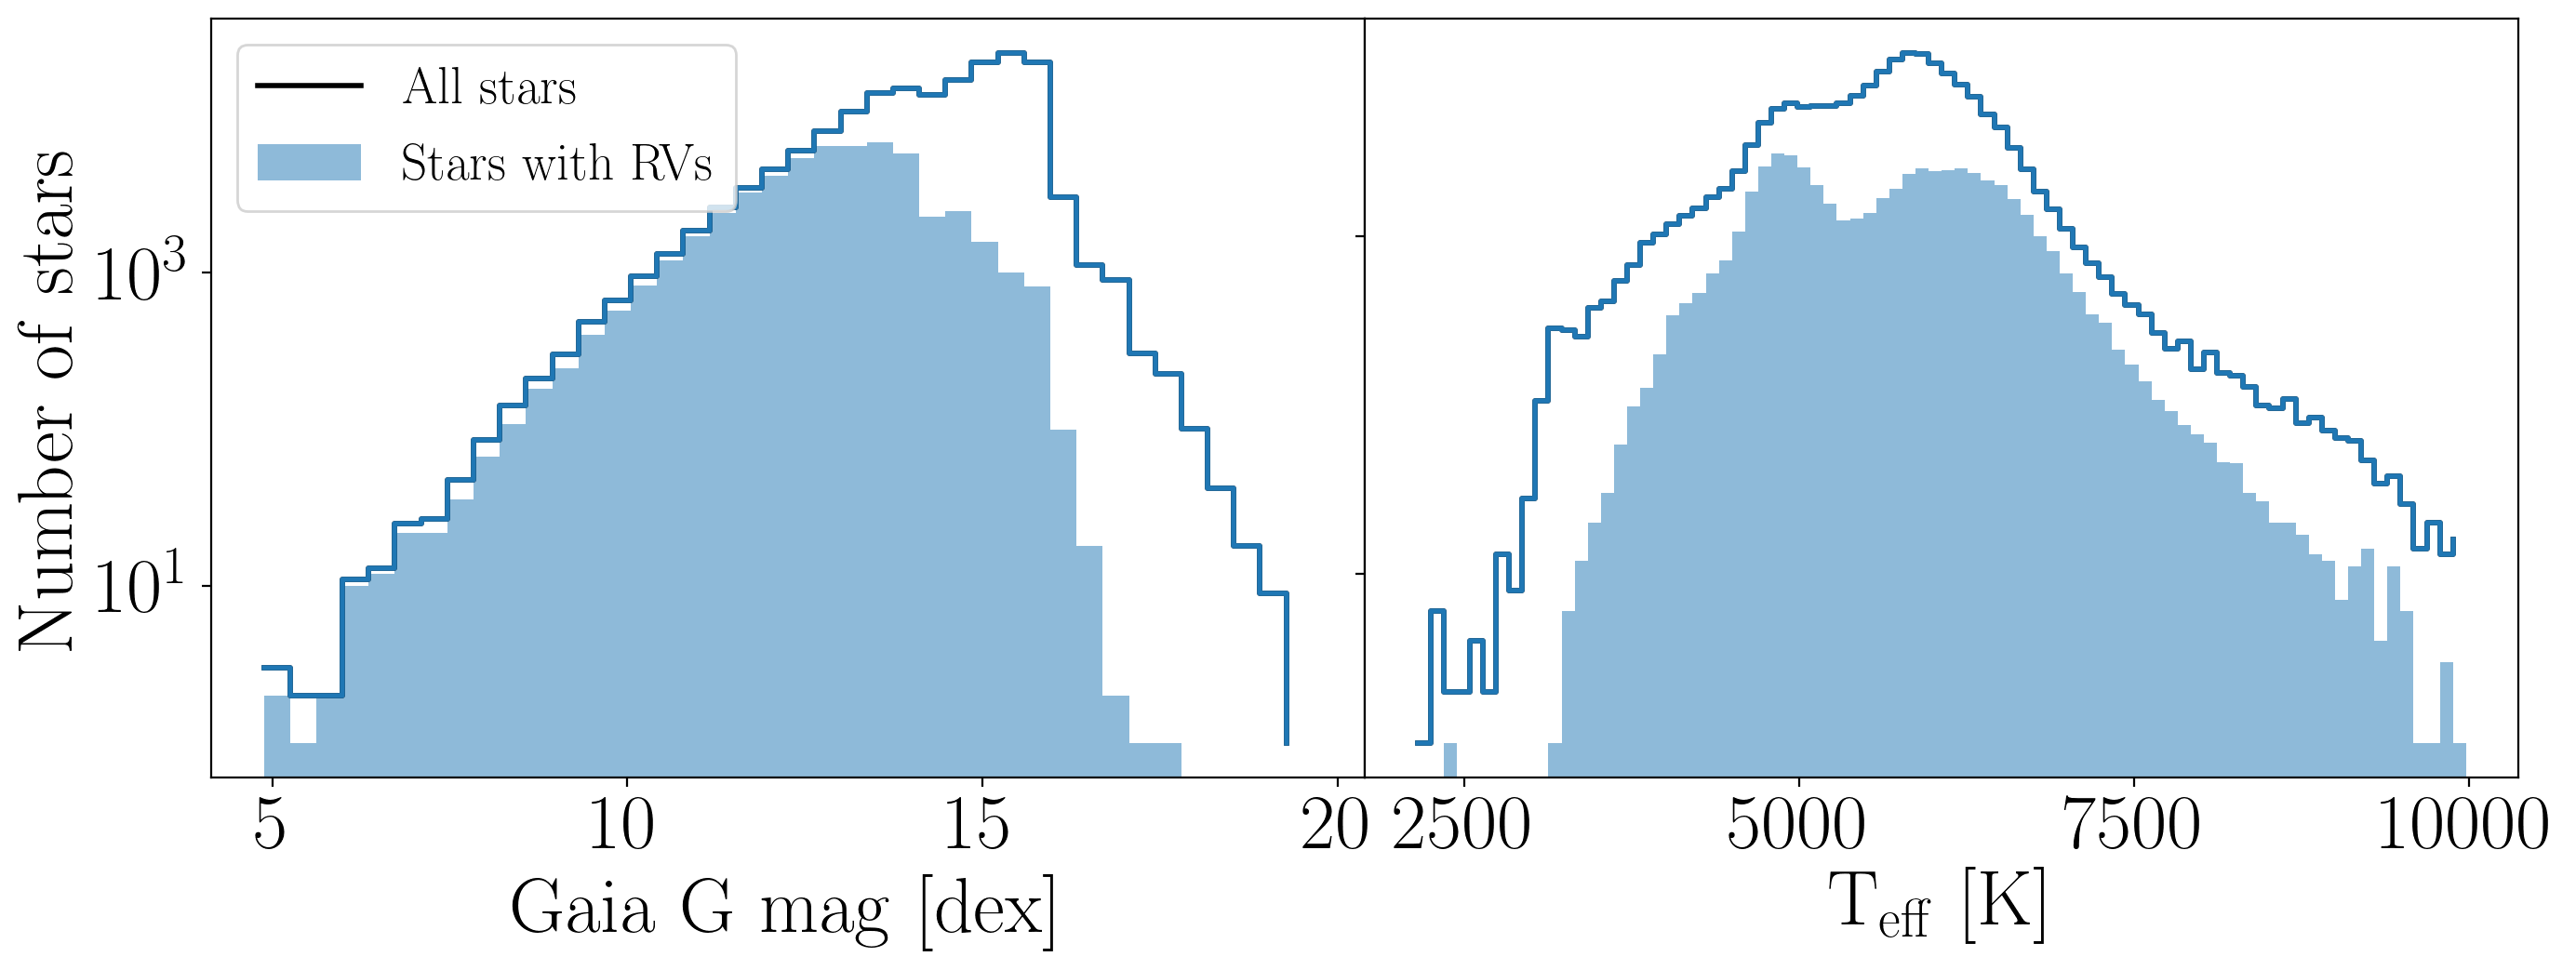

In [12]:
fig = plt.figure(figsize=(16, 6), dpi=200)

ax1 = fig.add_subplot(121)
n, bins = np.histogram(df.phot_g_mean_mag, 40)
ax1.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
ax1.hist(df.phot_g_mean_mag.values[m], bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(df.phot_g_mean_mag.values, bins=bins)
# ax1.step(bins[:-1], n, color="C0", lw=2, where="post");
ax1.set_xlabel("$\mathrm{Gaia~G~mag~[dex]}$");
ax1.set_ylabel("$\mathrm{Number~of~stars}$")
ax1.set_yscale("log")
# ax1.set_xlim(bins[0], 19)
# ax1.set_ylim(.8, 6000)
ax1.legend(loc="upper left", fontsize=20);
# ax1.set_xticklabels([])
# ax1.xaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter("$%.0f$"))
# ax1.set_xticks([9, 10, 11, 12, 13, 14, 15, 16, 17, 18], minor=True)

ax2 = fig.add_subplot(122)
n, bins = np.histogram(df.color_teffs, 80)
ax2.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
n, bins, _ = ax2.hist(df.color_teffs.values[m], bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(df.color_teffs.values, bins=bins)
ax2.step(bins[:-1], n, color="C0", lw=2, where="post");
ax2.set_xlabel("$\mathrm{T_{eff}~[K]}$");
ax2.set_yscale("log")
# ax2.set_xlim(7500, 1700)
# ax2.set_ylim(.7, 6000)
ax2.set_yticklabels([])
# ax2.xaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter("$%.0f$"))
# ax2.set_xticks([7000, 6000, 5000, 4000, 3000, 2000], minor=True)

# plt.tight_layout()
plt.subplots_adjust(wspace=.0, bottom=.2)

plt.savefig("rv_histogram")
plt.savefig("/Users/rangus/projects/kepler_kinematics/paper/rv_histogram.pdf")

print("minimum teff star with RV = ", min(df.color_teffs.values[m]))
print(sum(df.color_teffs.values[m] < 5000)/sum(df.color_teffs.values < 5000), "of stars cooler than 5000 K have RVs")
print(sum(df.color_teffs.values[m] > 5000)/sum(df.color_teffs.values > 5000), "of stars hotter than 5000 K have RVs")

print("faintest star with RV = ", max(df.phot_g_mean_mag.values[m]))
print(f"Median mag of stars with RVs = {np.median(df.phot_g_mean_mag.values[m])}")
print(f"Median mag of stars without RVs = {np.median(df.phot_g_mean_mag.values[~m])}")
print(sum(df.phot_g_mean_mag.values[m] > np.median(df.phot_g_mean_mag.values[~m])), "stars with RVs fainter than 15th")

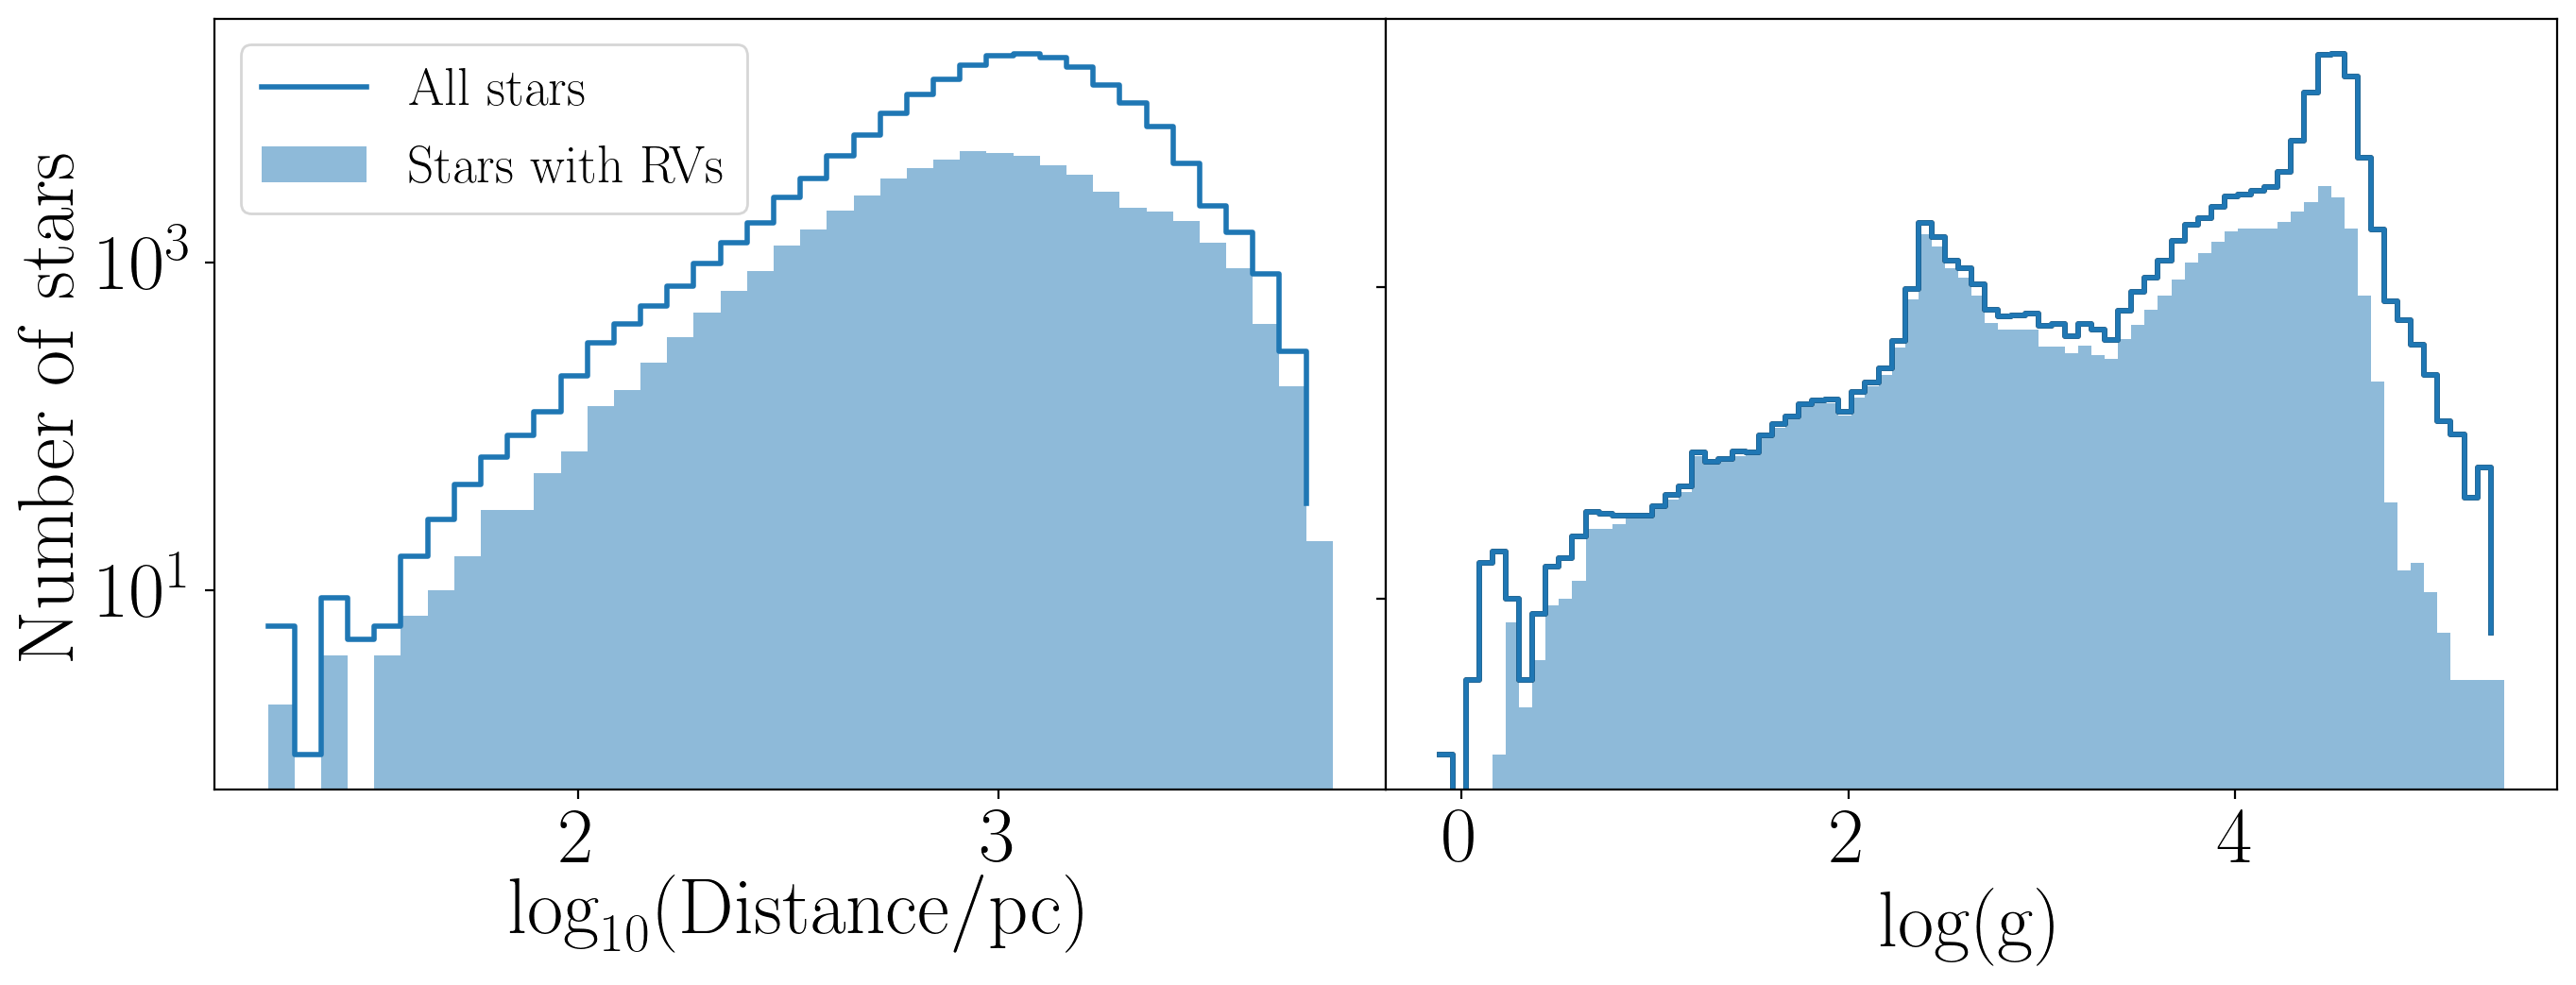

In [18]:
fig = plt.figure(figsize=(16, 6), dpi=200)

ax1 = fig.add_subplot(121)
n, bins = np.histogram(np.log10(df.r_est), 40)
ax1.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
ax1.hist(np.log10(df.r_est.values)[m], bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(df.r_est.values, bins=bins)
# ax1.step(bins[:-1], n, color="C0", lw=2, where="post");
ax1.set_xlabel("$\mathrm{\log_{10}(Distance/pc)}$");
ax1.set_ylabel("$\mathrm{Number~of~stars}$")
ax1.set_yscale("log")
ax1.legend(loc="upper left", fontsize=20);

ax2 = fig.add_subplot(122)
n, bins = np.histogram(df.logg, 80)
ax2.step(bins[:-1], n, color="k", lw="2", where="post", label="$\mathrm{All~stars}$");
n, bins, _ = ax2.hist(df.logg.values[m], bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(df.logg.values, bins=bins)
ax2.step(bins[:-1], n, color="C0", lw=2, where="post");
ax2.set_xlabel("$\mathrm{log(g)}$");
ax2.set_yscale("log")
ax2.set_yticklabels([])

plt.subplots_adjust(wspace=.0, bottom=.2)

In [ ]:
fig = plt.figure(figsize=(16, 12), dpi=200)

ax1 = fig.add_subplot(221)
n, bins = np.histogram(df.phot_g_mean_mag, 40)
ax1.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
ax1.hist(df.phot_g_mean_mag.values[m], bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(df.phot_g_mean_mag.values, bins=bins)
ax1.set_xlabel("$\mathrm{Gaia~G~mag~[dex]}$");
ax1.set_ylabel("$\mathrm{Number~of~stars}$")
ax1.set_yscale("log")
ax1.legend(loc="upper left", fontsize=18);

ax2 = fig.add_subplot(222)
n, bins = np.histogram(df.color_teffs, 80)
ax2.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
n, bins, _ = ax2.hist(df.color_teffs.values[m], bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(df.color_teffs.values, bins=bins)
ax2.set_xlabel("$\mathrm{T_{eff}~[K]}$");
ax2.set_yscale("log")
ax2.set_yticklabels([])

ax3 = fig.add_subplot(223)
n, bins = np.histogram(np.log10(df.r_est), 40)
ax3.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
ax3.hist(np.log10(df.r_est.values)[m], bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(df.r_est.values, bins=bins)
ax3.set_xlabel("$\mathrm{\log_{10}(Distance/pc)}$");
ax3.set_ylabel("$\mathrm{Number~of~stars}$")
ax3.set_yscale("log")
# ax3.legend(loc="upper left", fontsize=20);

ax4 = fig.add_subplot(224)
n, bins = np.histogram(df.logg, 80)
ax4.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
n, bins, _ = ax4.hist(df.logg.values[m], bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(df.logg.values, bins=bins)
ax4.set_xlabel("$\mathrm{log(g)}$");
ax4.set_yscale("log")
ax4.set_yticklabels([])

plt.subplots_adjust(wspace=.0, hspace=.3, bottom=.2)

# Examining sensitivity to the prior.

In [21]:
def mean_and_var(vx, vy, vz, lnD):
    V = np.stack((vx, vy, vz, lnD), axis=0)
    return np.mean(V, axis=1), np.cov(V)

lnD = np.log(1./df.parallax)
finite = np.isfinite(df.vx.values) & np.isfinite(df.vy.values) \
    & np.isfinite(df.vz.values) & np.isfinite(lnD)

nsigma = 3
mx = ss.sigma_clip(df.vx.values[finite], nsigma=nsigma)
my = ss.sigma_clip(df.vy.values[finite], nsigma=nsigma)
mz = ss.sigma_clip(df.vz.values[finite], nsigma=nsigma)
md = ss.sigma_clip(lnD[finite], nsigma=nsigma)
m = mx & my & mz & md

mu, cov = mean_and_var(df.vx.values[finite][m],
                       df.vy.values[finite][m],
                       df.vz.values[finite][m],
                       lnD[finite][m])

print(np.shape(cov))

(4, 4)


In [22]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse_mod(x, y, cov, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

#     cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [56]:
results = pd.read_csv("../data/all_kepler.csv")
rdf = pd.merge(results, df0, on="kepid", how="left")
print(np.shape(rdf))
rdf = rdf.iloc[np.isfinite(rdf.rv.values)]
results.keys(), np.shape(rdf)

(1044, 368)


(Index(['Unnamed: 0', 'Unnamed: 0.1', 'kepid', 'vx_inferred',
        'vx_inferred_errp', 'vx_inferred_errm', 'vx_inferred_err',
        'vy_inferred', 'vy_inferred_errp', 'vy_inferred_errm',
        'vy_inferred_err', 'vz_inferred', 'vz_inferred_errp',
        'vz_inferred_errm', 'vz_inferred_err', 'lndistance_inferred',
        'lndistance_inferred_errp', 'lndistance_inferred_errm',
        'lndistance_inferred_err'],
       dtype='object'),
 (484, 368))

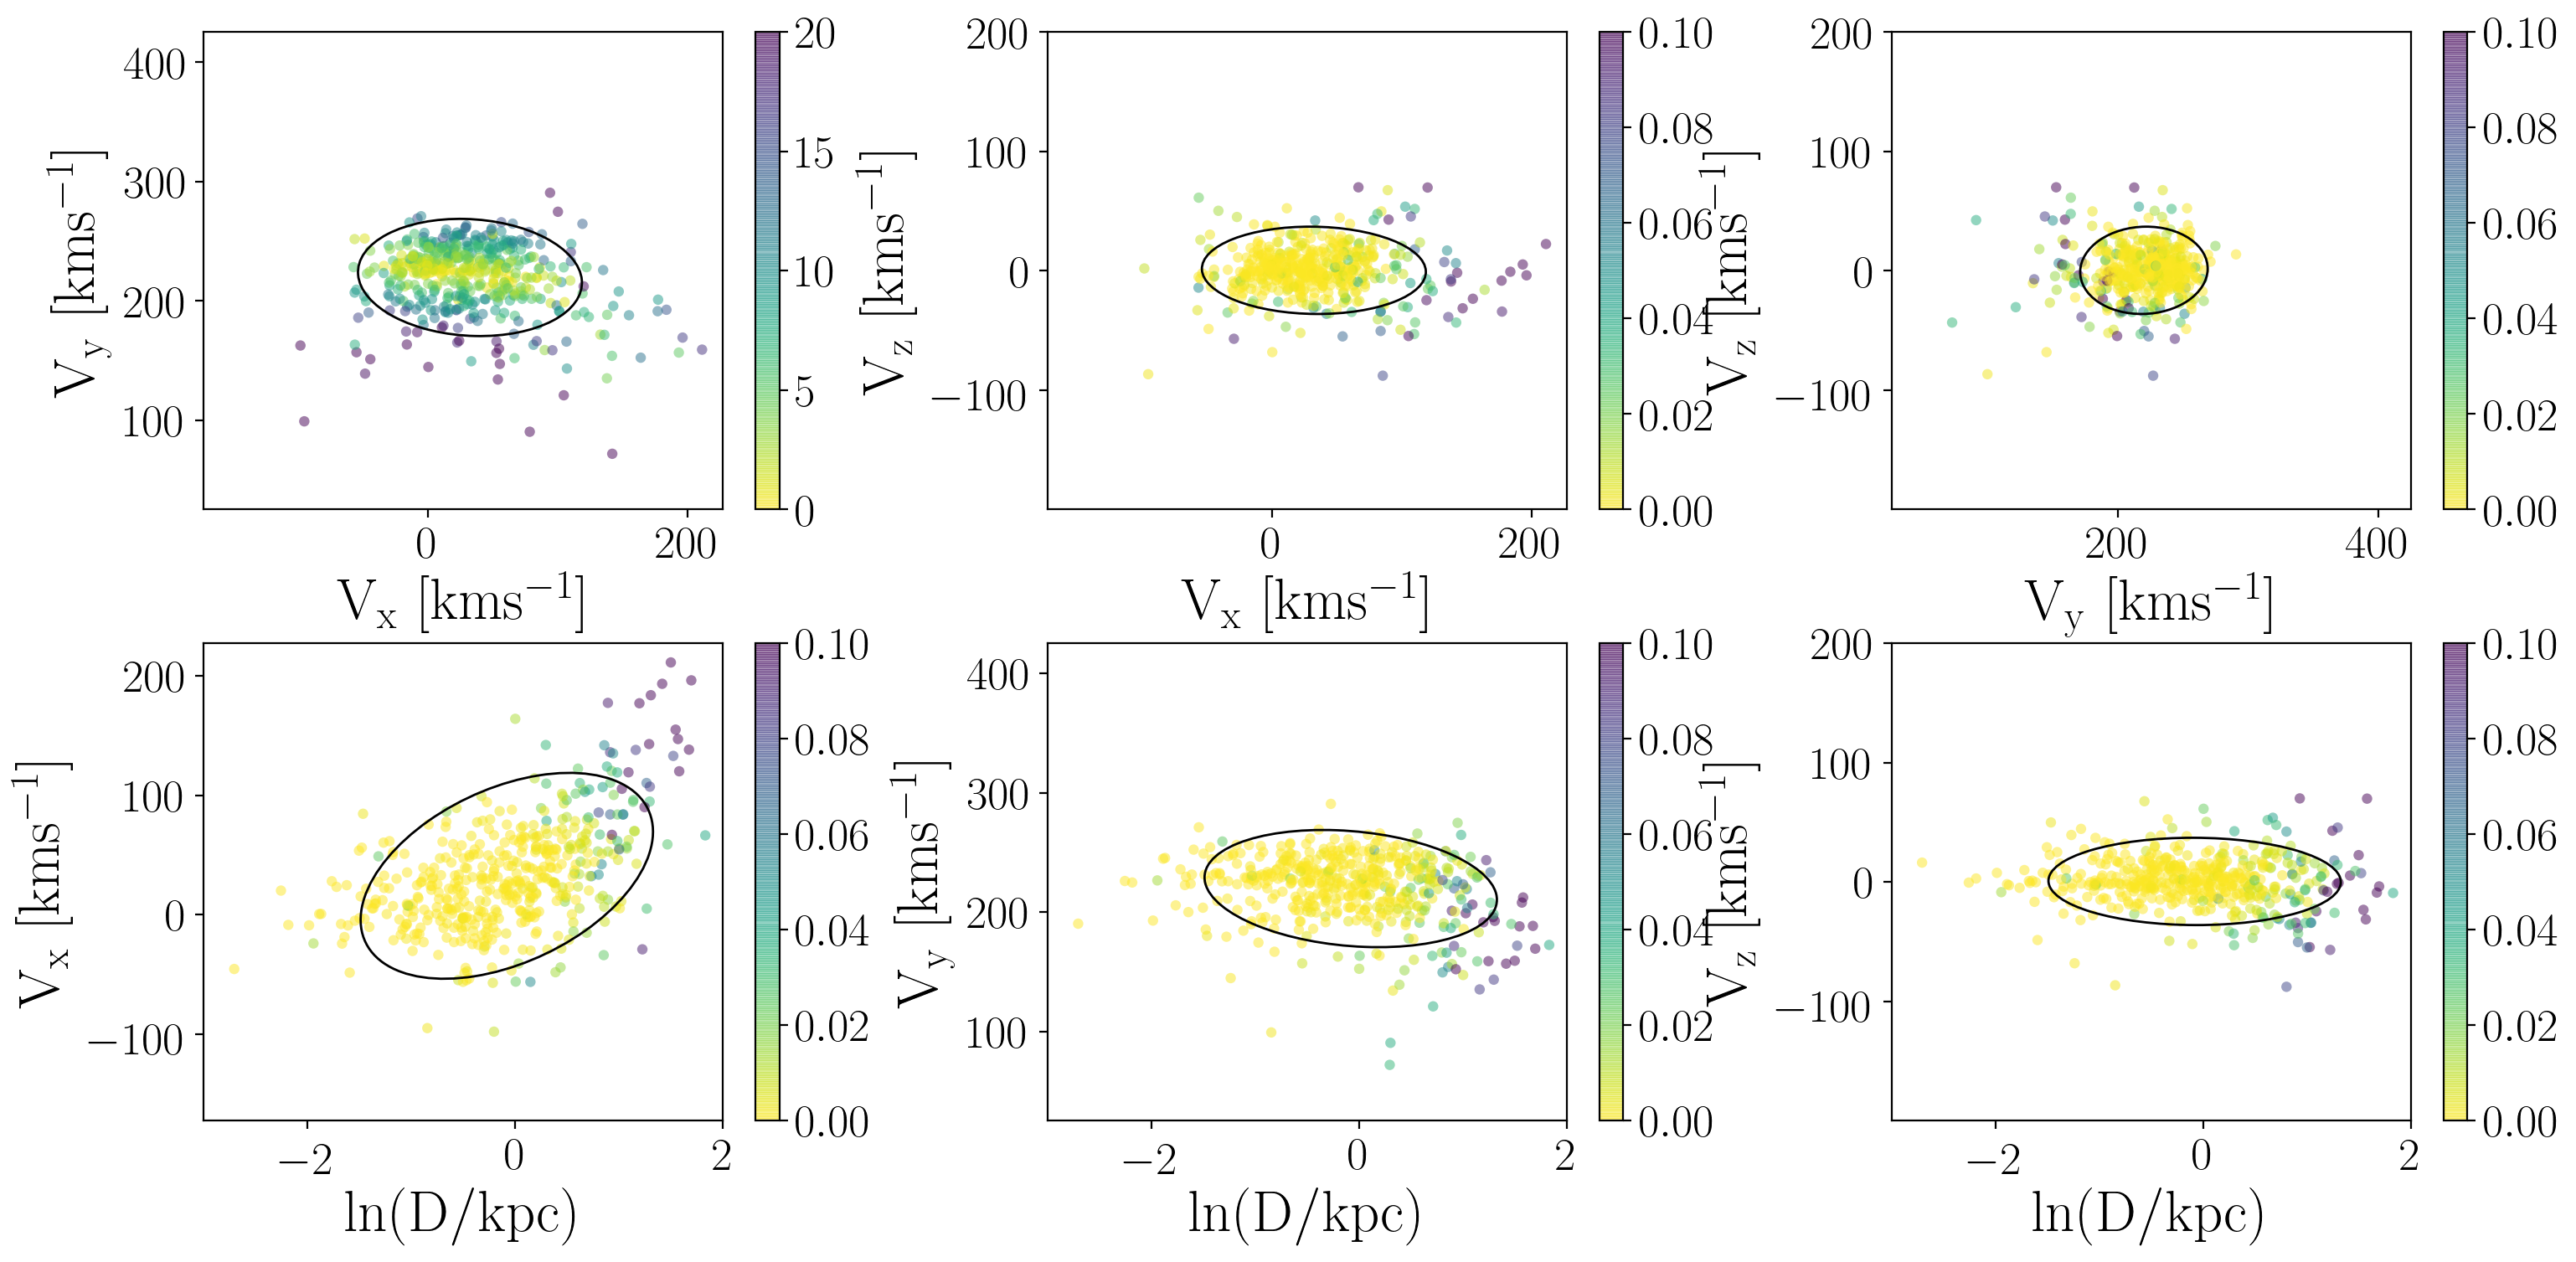

In [61]:
box = 200
lnD = np.log(1./rdf.parallax.values)
# lnD = np.log(rdf.r_est.values * 1e-3)
m = np.isfinite(rdf.vx.values) & np.isfinite(rdf.vy.values) & np.isfinite(rdf.vz.values) & np.isfinite(lnD)
vx_c, vy_c, vz_c, lnD_c = rdf.vx.values[m], rdf.vy.values[m], rdf.vz.values[m], lnD[m]
medx, medy, medz = np.median(vx_c), np.median(vy_c), np.median(vz_c)
xlim, ylim, zlim, dlim = (medx-box, medx+box), (medy-box, medy+box), (medz-box, medz+box), (-3, 2)

vxresid = abs(vx_c - rdf.vx_inferred.values[m])
vyresid = abs(vy_c - rdf.vy_inferred.values[m])
vzresid = abs(vz_c - rdf.vz_inferred.values[m])
dresid = abs(lnD_c - rdf.lndistance_inferred.values[m])

alpha, ms = .5, 20
color = "k"
cmap = "viridis_r"
vmin, vmax = 0, .1

fig = plt.figure(figsize=(16, 8), dpi=200)
ax0 = fig.add_subplot(231)
cb = ax0.scatter(vx_c, vy_c, c=vxresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=vmin, vmax=20)
_cov = np.array([[cov[0, 0], cov[0, 1]], [cov[1, 0], cov[1, 1]]])
confidence_ellipse_mod(vx_c, vy_c, _cov, ax0, n_std=2, edgecolor=color, zorder=1)
ax0.set_xlim(xlim)
ax0.set_ylim(ylim)
ax0.set_xlabel("$\mathrm{V_x~[kms^{-1}]}$")
ax0.set_ylabel("$\mathrm{V_y~[kms^{-1}]}$")
plt.colorbar(cb)

ax1 = fig.add_subplot(232)
cb = ax1.scatter(vx_c, vz_c, c=dresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=vmin, vmax=vmax)
_cov = np.array([[cov[0, 0], cov[0, 2]], [cov[2, 0], cov[2, 2]]])
confidence_ellipse_mod(vx_c, vz_c, _cov, ax1, n_std=2, edgecolor=color, zorder=1)
ax1.set_xlim(xlim)
ax1.set_ylim(zlim)
ax1.set_xlabel("$\mathrm{V_x~[kms^{-1}]}$")
ax1.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")
plt.colorbar(cb)

ax2 = fig.add_subplot(233)
cb = ax2.scatter(vy_c, vz_c, c=dresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=vmin, vmax=vmax)
_cov = np.array([[cov[1, 1], cov[1, 2]], [cov[2, 1], cov[2, 2]]])
confidence_ellipse_mod(vy_c, vz_c, _cov, ax2, n_std=2, edgecolor=color, zorder=1) 
ax2.set_xlim(ylim)
ax2.set_ylim(zlim)
ax2.set_xlabel("$\mathrm{V_y~[kms^{-1}]}$")
ax2.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")
plt.colorbar(cb)

ax3 = fig.add_subplot(234)
cb = ax3.scatter(lnD_c, vx_c, c=dresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=0, vmax=.1)
_cov = np.array([[cov[3, 3], cov[3, 0]], [cov[0, 3], cov[0, 0]]])
confidence_ellipse_mod(lnD_c, vx_c, _cov, ax3, n_std=2, edgecolor=color, zorder=1)
ax3.set_ylabel("$\mathrm{V_x~[kms^{-1}]}$")
ax3.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax3.set_xlim(dlim)
ax3.set_ylim(xlim)
plt.colorbar(cb)

ax4 = fig.add_subplot(235)
cb = ax4.scatter(lnD_c, vy_c, c=dresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=0, vmax=.1)
_cov = np.array([[cov[3, 3], cov[3, 1]], [cov[1, 3], cov[1, 1]]])
confidence_ellipse_mod(lnD_c, vy_c, _cov, ax4, n_std=2, edgecolor=color, zorder=1)
ax4.set_ylabel("$\mathrm{V_y~[kms^{-1}]}$")
ax4.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax4.set_xlim(dlim)
ax4.set_ylim(ylim)
plt.colorbar(cb)

ax5 = fig.add_subplot(236)
cb = ax5.scatter(lnD_c, vz_c, c=dresid, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, cmap=cmap, vmin=0, vmax=.1)
_cov = np.array([[cov[3, 3], cov[3, 2]], [cov[2, 3], cov[2, 2]]])
confidence_ellipse_mod(lnD_c, vz_c, _cov, ax5, n_std=2, edgecolor=color, zorder=1)
ax5.set_ylabel("$\mathrm{V_z~[kms^{-1}]}$")
ax5.set_xlabel("$\mathrm{\ln(D/kpc)}$")
ax5.set_xlim(dlim)
ax5.set_ylim(zlim)
plt.colorbar(cb)

plt.tight_layout()
plt.subplots_adjust(hspace=.28, wspace=.3)

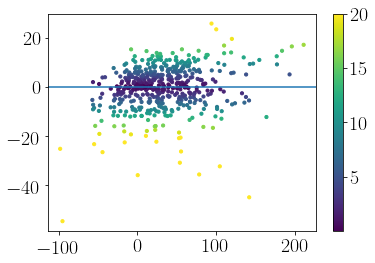

In [68]:
plt.scatter(rdf.vx, rdf.vx-rdf.vx_inferred, c=vxresid, s=10, vmax=20)
plt.axhline()
plt.colorbar()